In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./Diabetes main.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


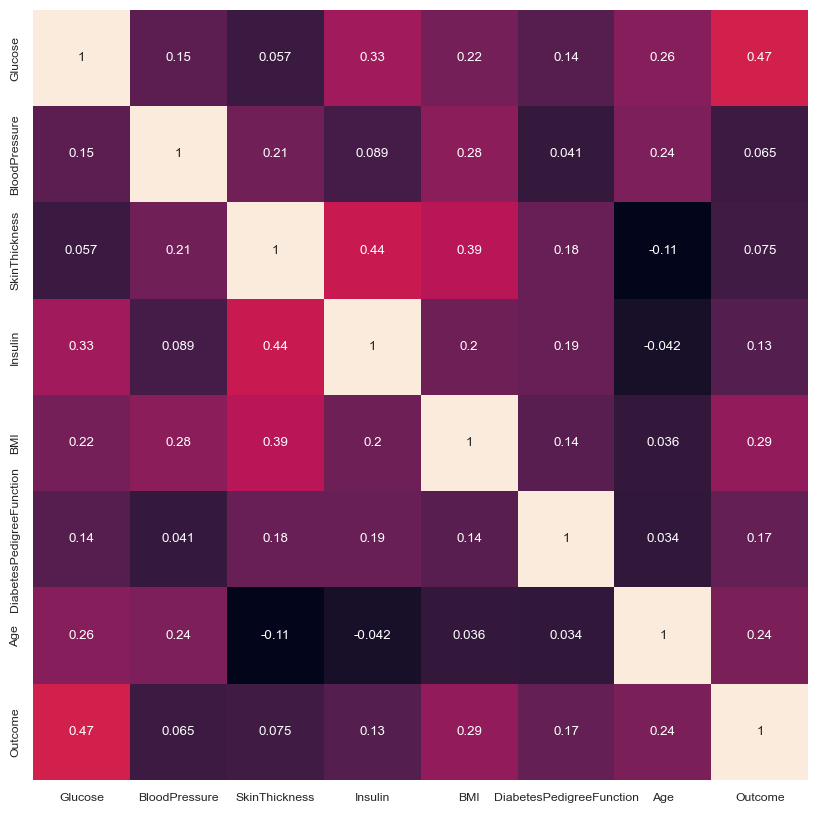

In [3]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X = df.drop('Outcome',axis=1)
X = df.drop('BMI',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,
6,148,72,35,0,0.627,50,1
1,85,66,29,0,0.351,31,0
8,183,64,0,0,0.672,32,1
1,89,66,23,94,0.167,21,0
0,137,40,35,168,2.288,33,1


In [6]:
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [7]:
Y = pd.get_dummies(y).values

In [8]:
X = X.values
X

array([[148.   ,  72.   ,  35.   , ...,   0.627,  50.   ,   1.   ],
       [ 85.   ,  66.   ,  29.   , ...,   0.351,  31.   ,   0.   ],
       [183.   ,  64.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,   0.245,  30.   ,   0.   ],
       [126.   ,  60.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [ 93.   ,  70.   ,  31.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
y

Pregnancies
6     33.6
1     26.6
8     23.3
1     28.1
0     43.1
      ... 
10    32.9
2     36.8
5     26.2
1     30.1
1     30.4
Name: BMI, Length: 768, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614, 248), (154, 7), (154, 248))

In [12]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/opt/homebrew/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371 (5.36 KB)

 Trainable params: 1,371 (5.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=7,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss

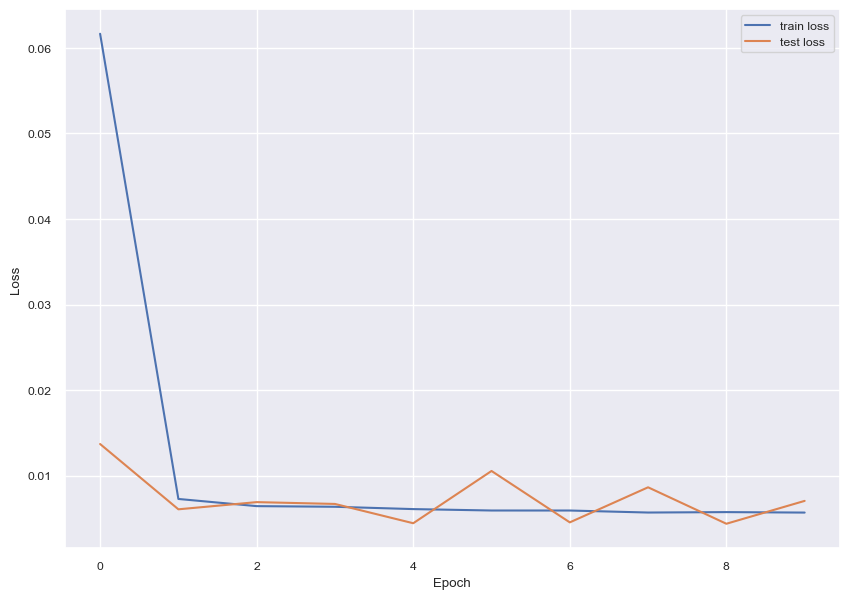

In [14]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0068 - mse: 0.0068


[0.007051127962768078, 0.007051127962768078]